# 00. Table of Content

### 01. Importing Libraries & Dataframes
### 02. Check on Relevant Variables
### 03. Explore Customer Profiles for Marketing
### 04. Explore Visualisations

# 01. Importing Libraries & Dataframes

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'C:\Users\krist\22.01.2024 Instacart Basket Analysis'

In [3]:
# Import last dataframe
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# 02. Check on Relevant Variables

In [4]:
ords_prods_all.shape

(30964564, 33)

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,department,_merge,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,both,South,high-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,both,South,high-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,both,South,high-activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,both,South,high-activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,both,South,high-activity


In [6]:
ords_prods_all.dtypes

order_id                           object
user_id                            object
order_number                        int64
order_day_of_week                   int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                         object
add_to_cart_order                   int64
reordered                           int64
product_name                       object
aisle_id                           object
department_id                      object
prices                            float64
busiest_day                        object
busiest_days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
mean_product_price                float64
spending_flag                      object
median_days_since_prior_order     float64
order_frequency_flag               object
gender                             object
state                             

In [7]:
ords_prods_all['gender'].value_counts(dropna=False)

gender
Male      15586740
Female    15377824
Name: count, dtype: int64

In [8]:
ords_prods_all['fam_status'].value_counts(dropna=False)

fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [9]:
ords_prods_all['n_dependants'].value_counts(dropna=False)

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [10]:
ords_prods_all['spending_flag'].value_counts(dropna=False)

spending_flag
low spender     30867692
high spender       96872
Name: count, dtype: int64

In [11]:
ords_prods_all.describe()

,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,prices,max_order,mean_product_price,median_days_since_prior_order,age,n_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,8.363038e+00,6.061019e-01,7.787995e+00,3.442569e+01,7.787995e+00,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,7.135399e+00,4.886127e-01,4.240180e+00,2.489504e+01,7.214475e-01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,4.200000e+00,1.400000e+01,7.382838e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,7.400000e+00,2.800000e+01,7.809649e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,1.130000e+01,4.800000e+01,8.221780e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [12]:
ords_prods_all['order_frequency_flag'].value_counts(dropna=False)

order_frequency_flag
frequent customer        21204476
regular customer          6865113
non-frequent customer     2894975
Name: count, dtype: int64

# 03. Explore Customer Profiles for Marketing

#### Customer Profile Options
       2024   Age min	Age max
    Boomer	  60	    78
    Gen X	  45	    59
    Millenial 30	    44
    Gen Z	  12	    29
    
                    Dependants
    Single          0
    Multi-person    >=1
    
                       Order Day of week
    Weekend Shopper    0&1
    Weekday Shooper    2-6
    
                       Order hour of week
    Daytime Shopper    7 - 22
    Nighttime Shopper  22 - 7
    
                       Income
    Low Income         <100.000          
    Mid Income         100.000 - 200.000          
    High Income        >200.000           
    
                       Department_id
    Parent             18
    Petowner           8
    

In [13]:
# Create customer segmentation 'age'
result_1 = []

for value in ords_prods_all['age']:
    if value > 59:
        result_1.append('boomer+')
    elif value > 44 and value <= 59:
        result_1.append('genX')
    elif value > 29 and value <= 44:
        result_1.append('millennial')
    elif value <= 29:
        result_1.append('genZ')
    else:
        result_1.append('nan')

In [14]:
# Check result
result_1

['millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'millennial',
 'boomer+',
 'boomer+',
 'boomer+',
 'boomer+',
 'boomer+',
 'boomer+',
 'boomer+',
 'boomer+',
 'boomer+',
 'boome

In [15]:
# Create customer segmentation 'dependants'
result_2 = []

for value in ords_prods_all['n_dependants']:
    if value == 0:
        result_2.append('single_hh')
    else:
        result_2.append('multi_hh')


In [16]:
# Check result
result_2

['multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'multi_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_hh',
 'single_

In [17]:
# Create customer segmentation 'order_day_of_Week'
result_3 = []

for value in ords_prods_all['order_day_of_week']:
    if value == 0 or value == 1:
        result_3.append('weekend')
    else:
        result_3.append('weekday')

In [18]:
# Check result
result_3

['weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekend',
 'weekend',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekend',
 'weekend',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekend',
 'weekend',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekend',
 'weekend',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekend',
 'weekday',
 'weekend',
 'weekend',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekday',
 'weekday',
 'weekend',
 'weekend',
 'weekday',
 'weekday',
 'weekend',
 'weekday',
 'weekend',
 'weekend',
 'weekend',
 'weekday',
 'weekday',
 'weekend',
 'weekday',
 'weekday',
 'weekday',
 'weekend',
 'weekday',
 'weekday',
 'weekend',
 'weekend',
 'weekday',
 'we

In [19]:
# Create customer segmentation 'order_hour_of_day'
result_4 = []

for value in ords_prods_all['order_hour_of_day']:
    if value >=7 and value <=22:
        result_4.append('daytime_shopper')
    else:
        result_4.append('nighttime_shopper')

In [1]:
# Create customer_profile_1 column and fill with age results
ords_prods_all['customer_profile_1'] = result_1

NameError: name 'result_1' is not defined

In [21]:
# Check on new column
ords_prods_all['customer_profile_1'].value_counts(dropna=False)

customer_profile_1
boomer+       10574504
genX           7311091
millennial     7261366
genZ           5817603
Name: count, dtype: int64

In [22]:
# Concatenate the dependant results to age results
ords_prods_all['customer_profile_1'] = ords_prods_all['customer_profile_1'] + "_" + result_2

In [23]:
# Check on new column
ords_prods_all['customer_profile_1'].value_counts(dropna=False)

customer_profile_1
boomer+_multi_hh        7929233
genX_multi_hh           5483093
millennial_multi_hh     5442572
genZ_multi_hh           4369985
boomer+_single_hh       2645271
genX_single_hh          1827998
millennial_single_hh    1818794
genZ_single_hh          1447618
Name: count, dtype: int64

In [24]:
# Create 'customer_profile_2' column with order_day_of week result
ords_prods_all['customer_profile_2'] = result_3

In [25]:
# Concatenate order_hour_of day result to exisiting values
ords_prods_all['customer_profile_2'] = ords_prods_all['customer_profile_2'] + "_" + result_4

In [26]:
# Check on new column
ords_prods_all['customer_profile_2'].value_counts(dropna=False)

customer_profile_2
weekday_daytime_shopper      18807322
weekend_daytime_shopper      10924344
weekday_nighttime_shopper      836946
weekend_nighttime_shopper      395952
Name: count, dtype: int64

In [229]:
# Create product segmentation 'babies'
result_5 = []

for value in ords_prods_all['department']:
    if value == 'babies':
        result_5.append('baby_products')
    else:
        result_5.append('no_baby_products')

In [230]:
# Create 'product_baby' column
ords_prods_all['product_baby'] = result_5

In [232]:
# Check on new column
ords_prods_all['product_baby'].value_counts(dropna=False)

product_baby
no_baby_products    30554172
baby_products         410392
Name: count, dtype: int64

In [233]:
# Create customer segmentation 'income'
result_7 = []

for value in ords_prods_all['income']:
    if value > 9.943773e+04:
        result_7.append('income_above_average')
    else:
        result_7.append('income_below_average')

In [234]:
# Create 'income_level' column
ords_prods_all['income_level'] = result_7

In [235]:
# Check on new column
ords_prods_all['income_level'].value_counts(dropna=False)

income_level
income_below_average    16529702
income_above_average    14434862
Name: count, dtype: int64

In [216]:
# Create customer segmentation 'product price'
result_8 = []

for value in ords_prods_all['prices']:
    if value <= 5:
        result_8.append('product_price <5$')
    elif value > 5 and value <= 10:
        result_8.append('product_price 5-10$')
    elif value > 10 and value <= 15:
        result_8.append('product_price 10-15$')
    else:
        result_8.append('product_price >15$')

In [217]:
# Create 'product_price_level' column
ords_prods_all['product_price_level'] = result_8

In [218]:
# Check on new column
ords_prods_all['product_price_level'].value_counts(dropna=False)

product_price_level
product_price 5-10$     11244704
product_price <5$        9679063
product_price 10-15$     9647721
product_price >15$        393076
Name: count, dtype: int64

# 03. Explore Visualisations

### Order Distribution

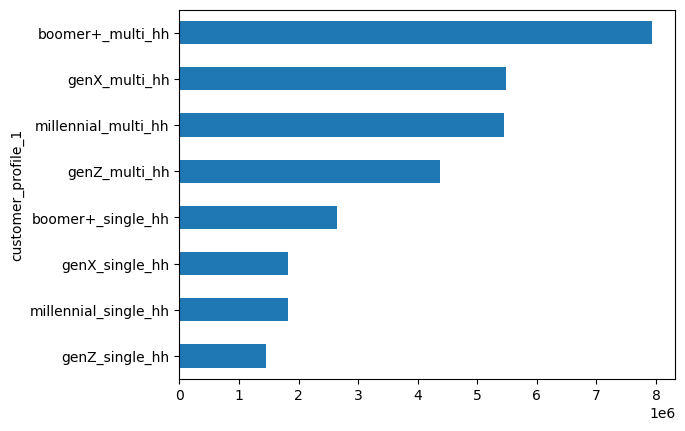

In [138]:
# Create Bar Chart on customer_profile_1
bar_1 = ords_prods_all['customer_profile_1'].value_counts().sort_values(ascending=True).plot.barh()

In [141]:
# Set labels and title
bar_1.set_xlabel('order count')
bar_1.set_ylabel('age & dependants')
bar_1.set_title('Demographic Distribution of Orders')

Text(0.5, 1.0, 'Demographic Distribution of Orders')

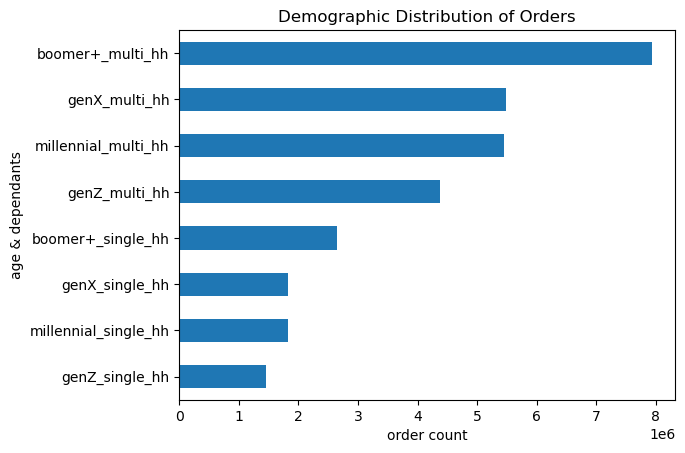

In [142]:
# Check
bar_1.figure

In [143]:
# Export bar chart as image file
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_10.png'), bbox_inches = 'tight')

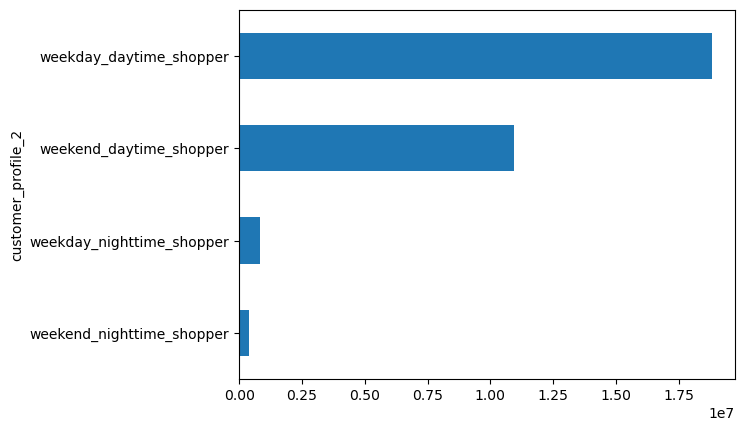

In [144]:
# Create Bar Char on customer_profile_2
bar_2 = ords_prods_all['customer_profile_2'].value_counts().sort_values(ascending=True).plot.barh()

In [145]:
# Set labels and title
bar_2.set_xlabel('order count')
bar_2.set_ylabel('shopping type')
bar_2.set_title('Distribution of Orders per Shopping Type')

Text(0.5, 1.0, 'Distribution of Orders per Shopping Type')

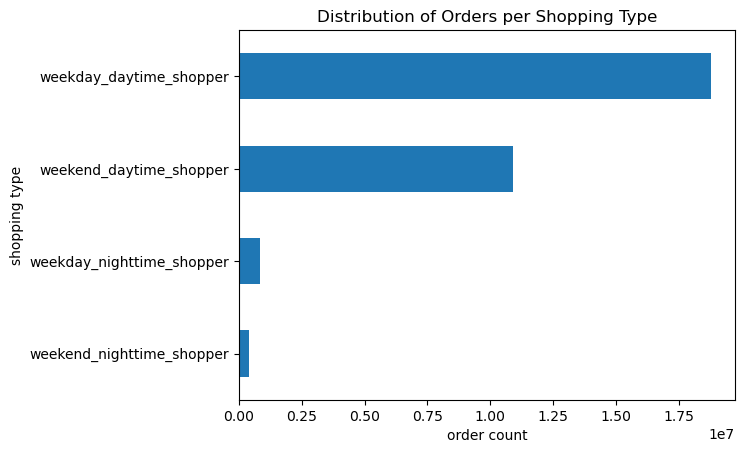

In [146]:
bar_2.figure

In [147]:
# Export bar chart as image file
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'fig_11.png'), bbox_inches = 'tight')

In [148]:
# Group by 'customer_profile_1' and 'income level', and count occurrences
bar_1_income = ords_prods_all.groupby(['customer_profile_1', 'income_level']).size().unstack()

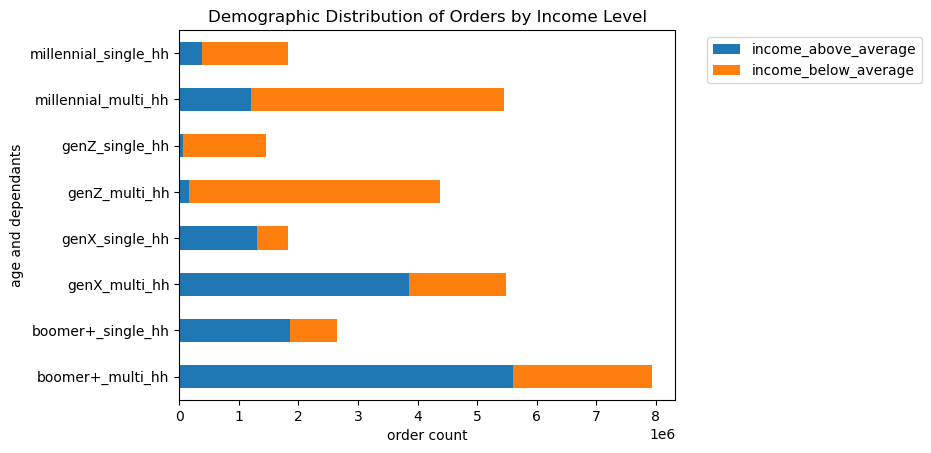

In [149]:
# Step 1: Plot the bar chart
bar_1_income_plot = bar_1_income.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders by Income Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

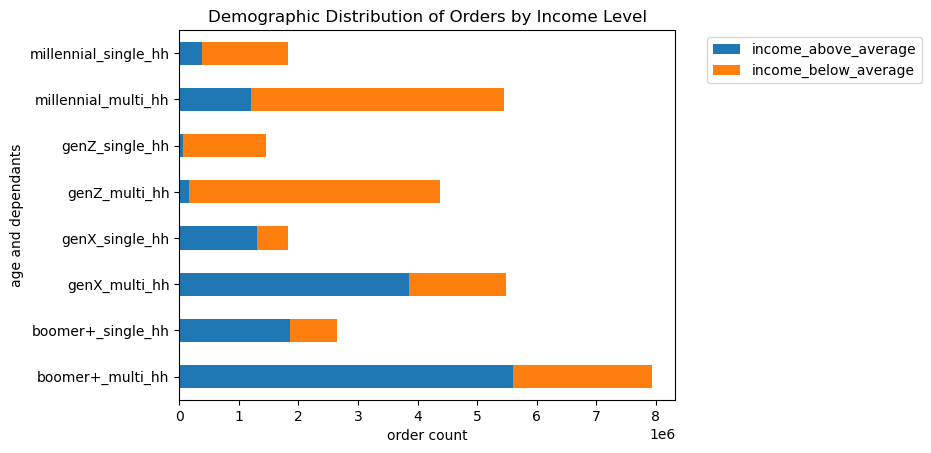

In [150]:
# Create image for export
bar_1_income_plot.figure

In [151]:
# Export the plot as image file
bar_1_income_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_12.png'), bbox_inches='tight')

In [152]:
# Group by 'customer_profile_1' and 'spending_flag', and count occurrences
bar_1_loyalty = ords_prods_all.groupby(['customer_profile_1', 'loyalty_flag']).size().unstack()

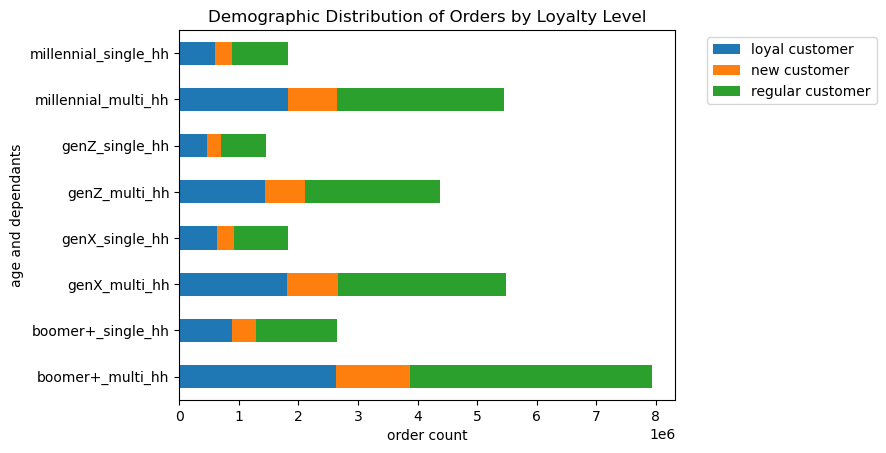

In [153]:
# Plot the bar chart
bar_1_loyalty_plot = bar_1_loyalty.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders by Loyalty Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

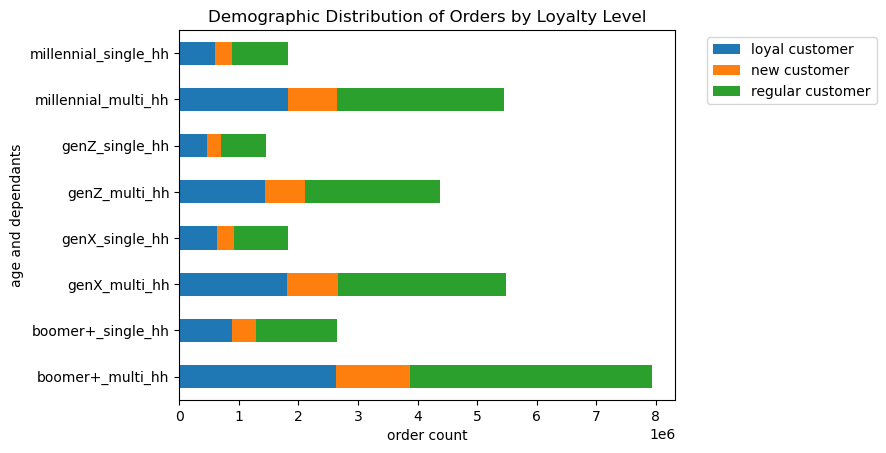

In [154]:
# Create image for export
bar_1_loyalty_plot.figure

In [155]:
# Export the plot as image file
bar_1_loyalty_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_13.png'), bbox_inches='tight')

In [156]:
# Group by 'customer_profile_1' and 'department', and count occurrences
bar_1_department = ords_prods_all.groupby(['customer_profile_1', 'department']).size().unstack()

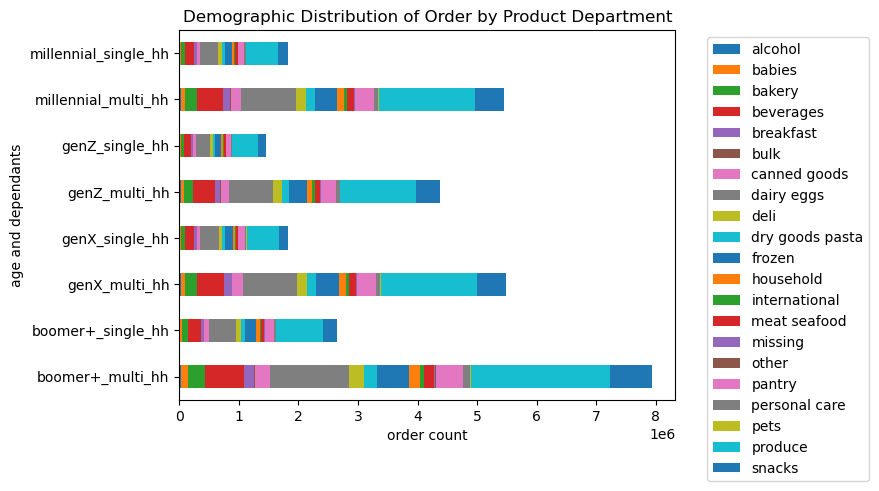

In [157]:
# Plot the bar chart
bar_1_department_plot = bar_1_department.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Order by Product Department')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

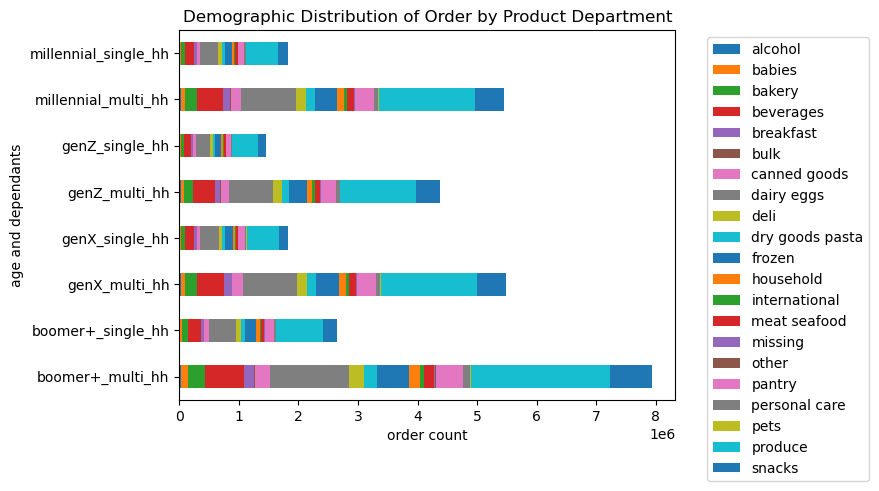

In [158]:
# Create image for export
bar_1_department_plot.figure

In [159]:
# Export the plot as image file
bar_1_department_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_14.png'), bbox_inches='tight')

In [161]:
# Group by 'customer_profile_1' and 'customer_profile_2', and count occurrences
bar_1_shopper = ords_prods_all.groupby(['customer_profile_1', 'customer_profile_2']).size().unstack()

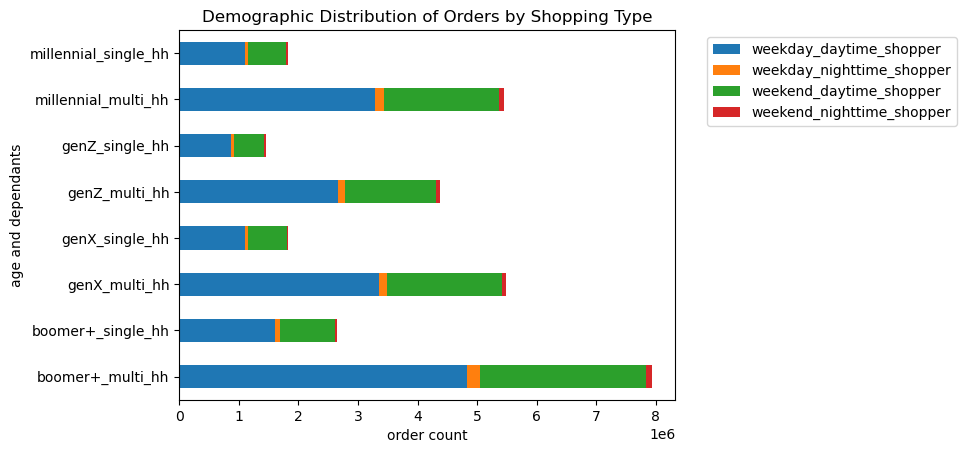

In [162]:
# Plot the bar chart
bar_1_shopper_plot = bar_1_shopper.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders by Shopping Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

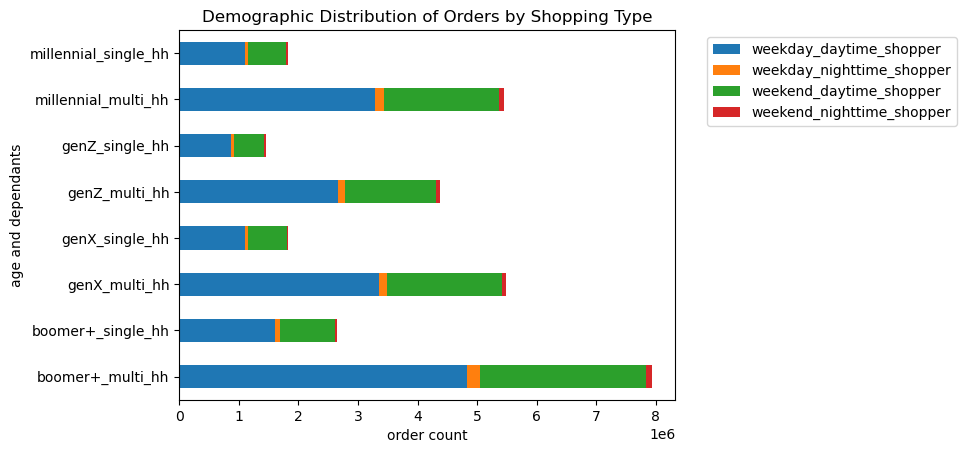

In [163]:
# Create image for export
bar_1_shopper_plot.figure

In [164]:
# Step 2: Export the plot as image file
bar_1_shopper_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_15.png'), bbox_inches='tight')

In [165]:
# Group by 'customer_profile_1' and 'order_frequency_flag', and count occurrences
bar_1_order_frequency = ords_prods_all.groupby(['customer_profile_1', 'order_frequency_flag']).size().unstack()

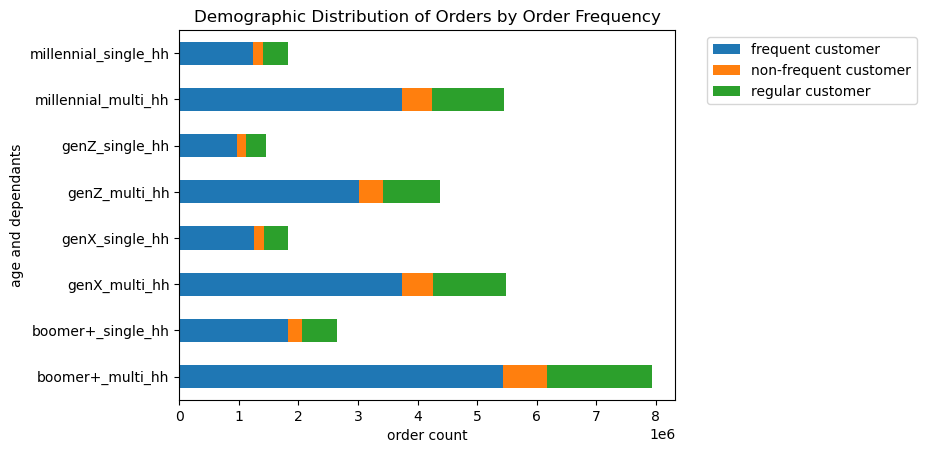

In [166]:
# Plot the bar chart
bar_1_order_frequency_plot = bar_1_order_frequency.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders by Order Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

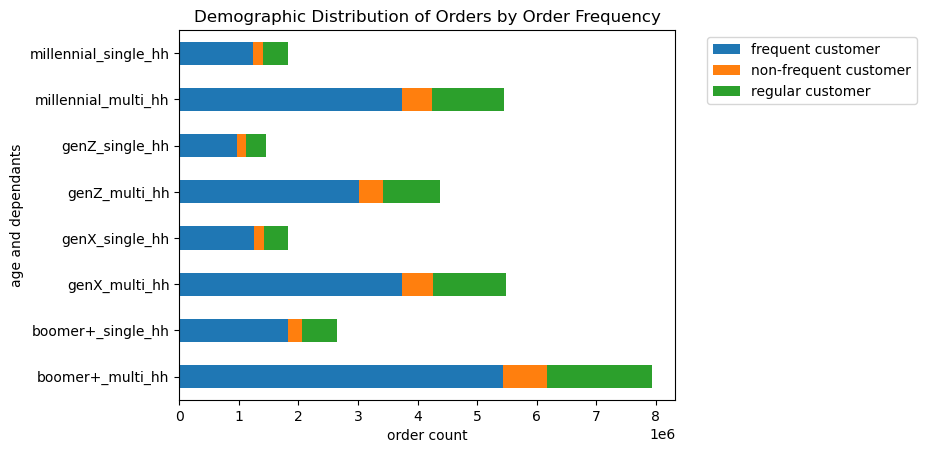

In [167]:
# Create image for export
bar_1_order_frequency_plot.figure

In [168]:
# Export the plot as image file
bar_1_order_frequency_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_16.png'), bbox_inches='tight')

In [219]:
# Group by 'customer_profile_1' and 'product price level', and count occurrences
bar_1_price = ords_prods_all.groupby(['customer_profile_1', 'product_price_level']).size().unstack()

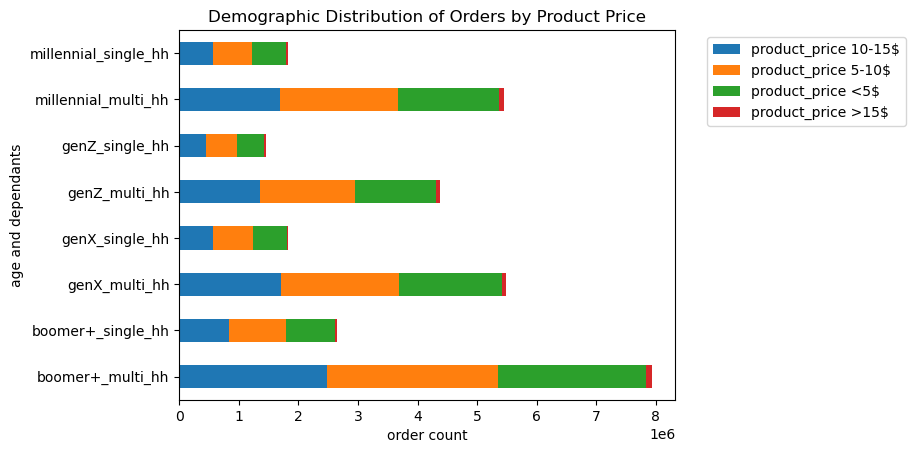

In [220]:
# Plot the bar chart
bar_1_price_plot = bar_1_price.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders by Product Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

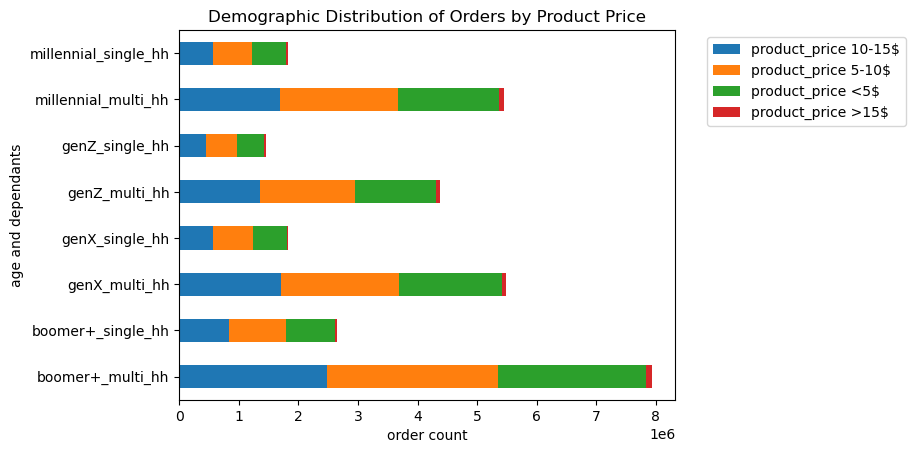

In [221]:
# Create image for export
bar_1_price_plot.figure

In [222]:
# Export the plot as image file
bar_1_price_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_17.png'), bbox_inches='tight')

In [173]:
# Group by 'customer_profile_1' and 'region', and count occurrences
bar_1_region = ords_prods_all.groupby(['customer_profile_1', 'region']).size().unstack()

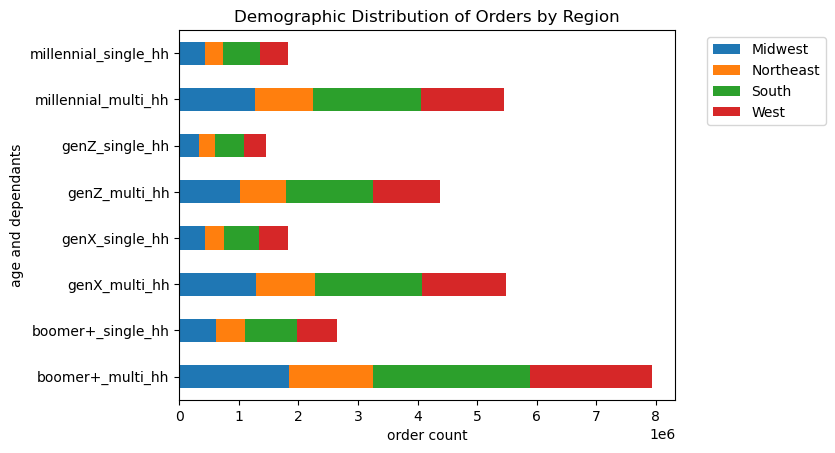

In [174]:
# Plot the bar chart
bar_1_region_plot = bar_1_region.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

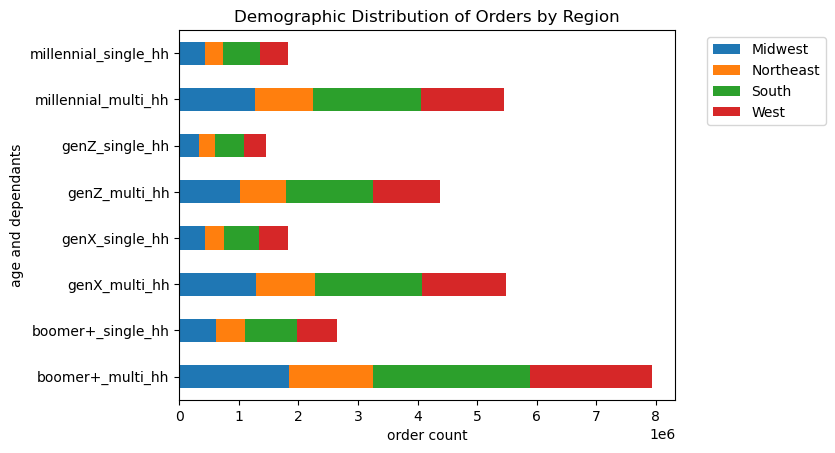

In [175]:
# Create image for export
bar_1_region_plot.figure

In [176]:
# Step 2: Export the plot as image file
bar_1_region_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_18.png'), bbox_inches='tight')

In [237]:
# Group by 'customer_profile_1' and 'family status', and count occurrences
bar_1_family = ords_prods_all.groupby(['customer_profile_1', 'fam_status']).size().unstack()

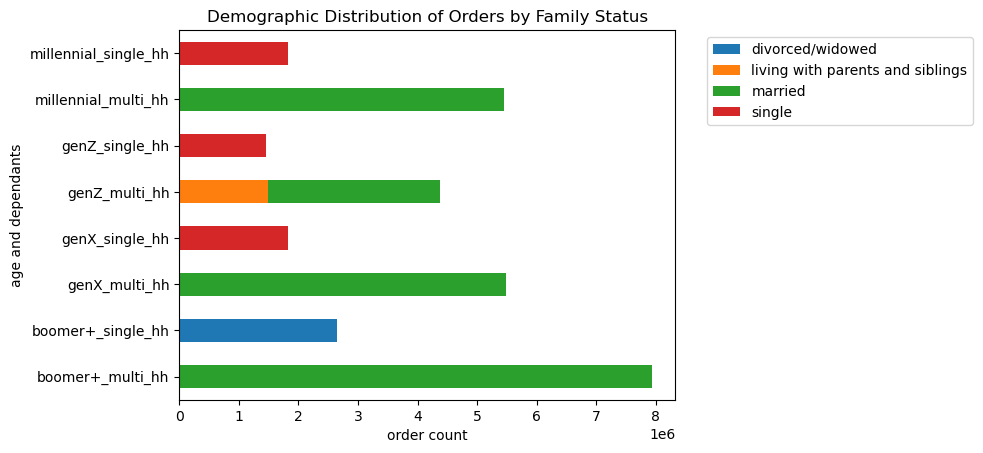

In [238]:
# Plot the bar chart
bar_1_family_plot = bar_1_family.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders by Family Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

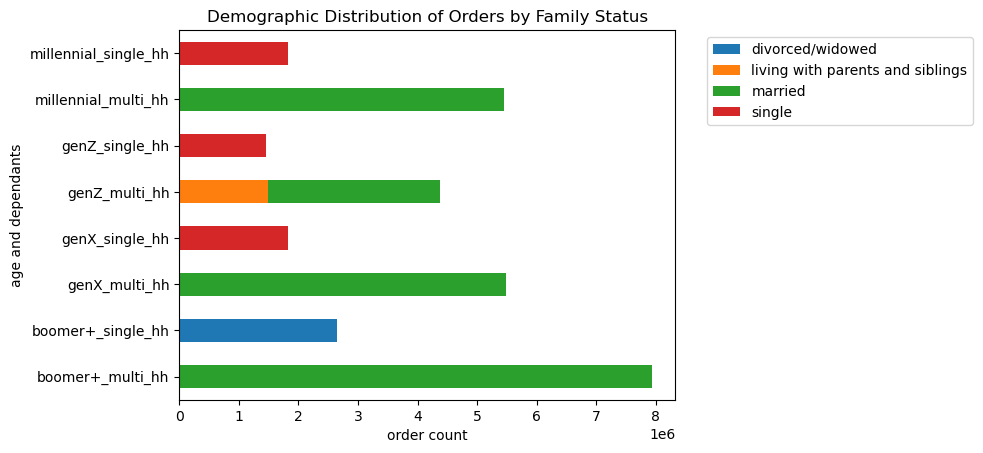

In [239]:
# Create image for export
bar_1_family_plot.figure

In [272]:
# Export the plot as image file
bar_1_family_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_25.png'), bbox_inches='tight')

In [249]:
# Filter for baby products
df_baby = ords_prods_all.loc[ords_prods_all['product_baby'] == 'baby_products'].head()

In [252]:
# Group by 'customer_profile_1' and 'product_baby', and count occurrences
bar_1_baby = df_baby.groupby(['customer_profile_1','product_baby']).size().unstack()

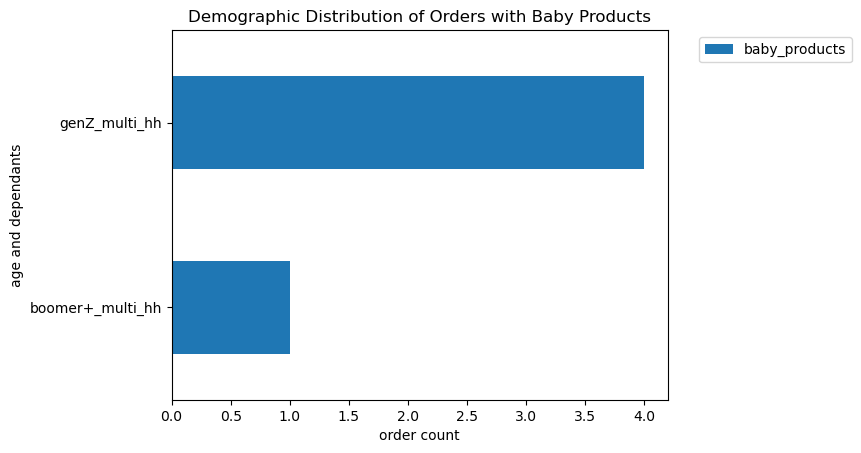

In [254]:
# Plot the bar chart
bar_1_baby_plot = bar_1_baby.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('age and dependants')
plt.title('Demographic Distribution of Orders with Baby Products')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

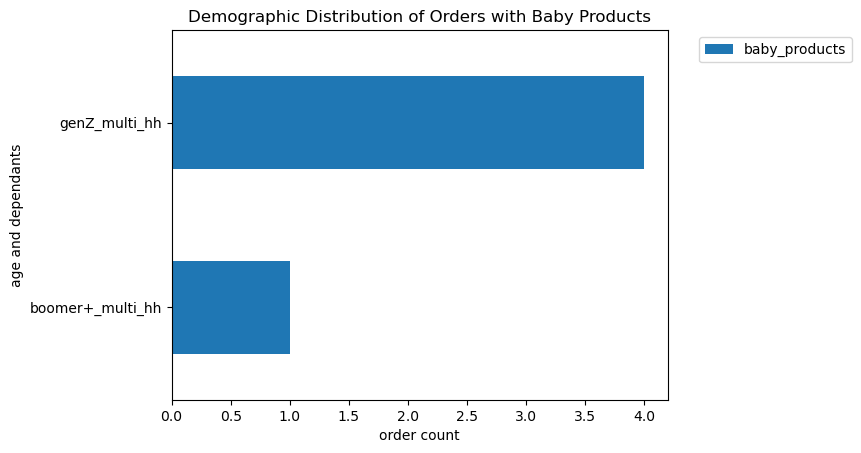

In [255]:
# Create image for export
bar_1_baby_plot.figure

In [256]:
# Export the plot as image file
bar_1_baby_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_26.png'), bbox_inches='tight')

In [177]:
# Group by 'customer_profile_2' and 'income', and count occurrences
bar_2_income = ords_prods_all.groupby(['customer_profile_2', 'income_level']).size().unstack()

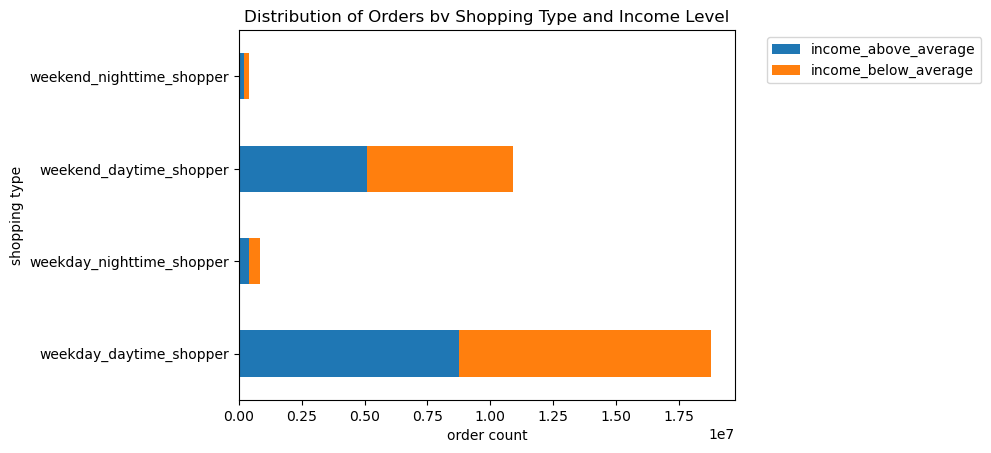

In [178]:
# Plot the bar chart
bar_2_income_plot = bar_2_income.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopping type')
plt.title('Distribution of Orders bv Shopping Type and Income Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

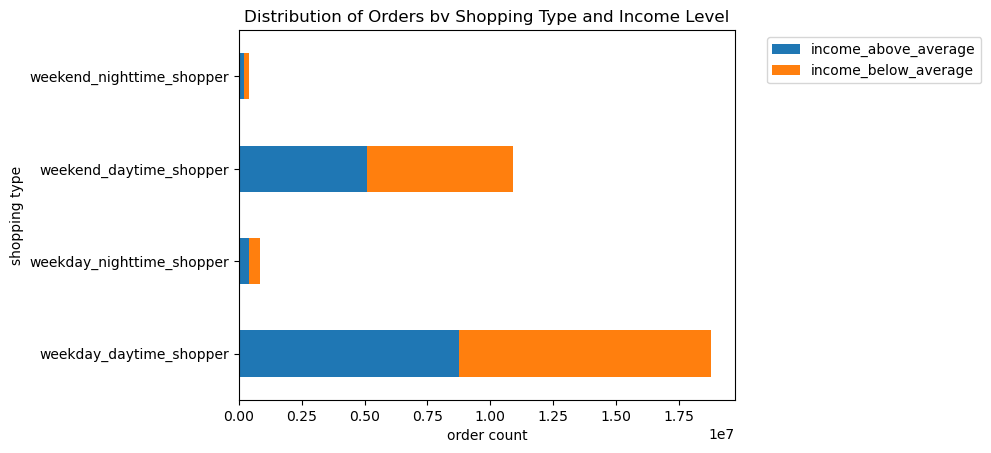

In [179]:
# Create image for export
bar_2_income_plot.figure

In [180]:
# Step 2: Export the plot as image file
bar_2_income_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_19.png'), bbox_inches='tight')

In [181]:
# Group by 'customer_profile_2' and 'loyalty', and count occurrences
bar_2_loyalty = ords_prods_all.groupby(['customer_profile_2', 'loyalty_flag']).size().unstack()

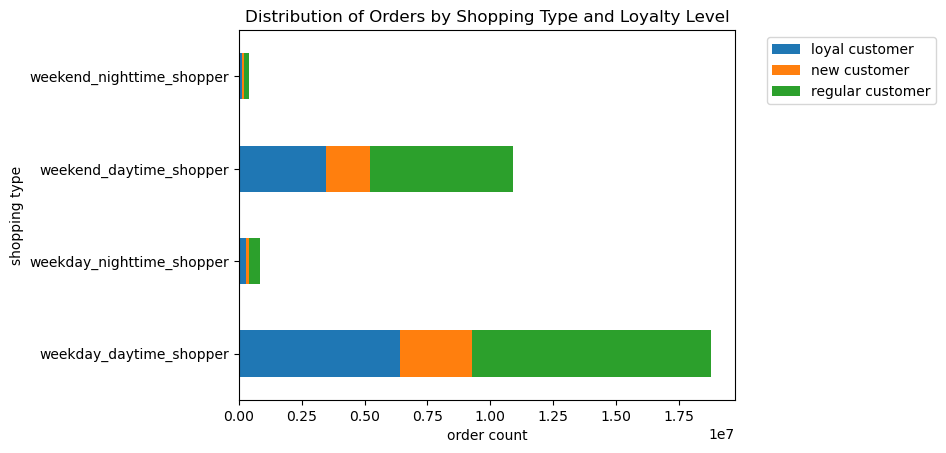

In [182]:
# Plot the bar chart
bar_2_loyalty_plot = bar_2_loyalty.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopping type')
plt.title('Distribution of Orders by Shopping Type and Loyalty Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

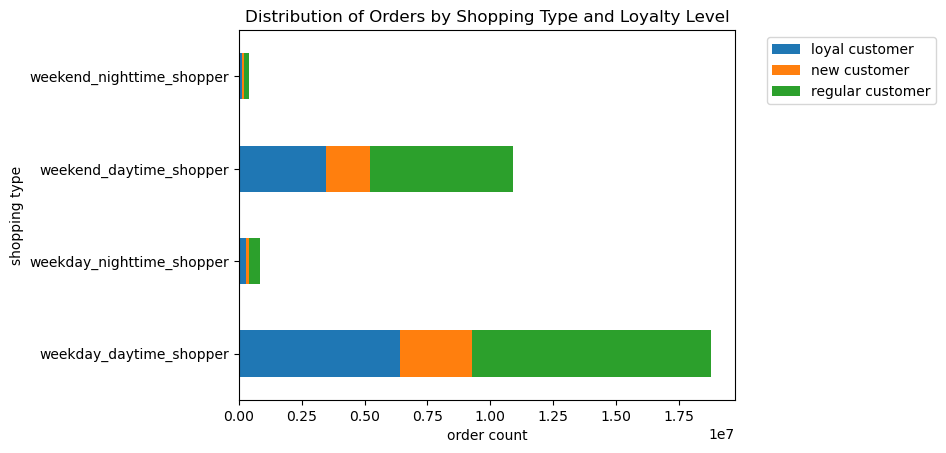

In [183]:
# Create image for export
bar_2_loyalty_plot.figure

In [184]:
# Export the plot as image file
bar_2_loyalty_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_20.png'), bbox_inches='tight')

In [186]:
# Group by 'customer_profile_2' and 'income', and count occurrences
bar_2_department = ords_prods_all.groupby(['customer_profile_2', 'department']).size().unstack()

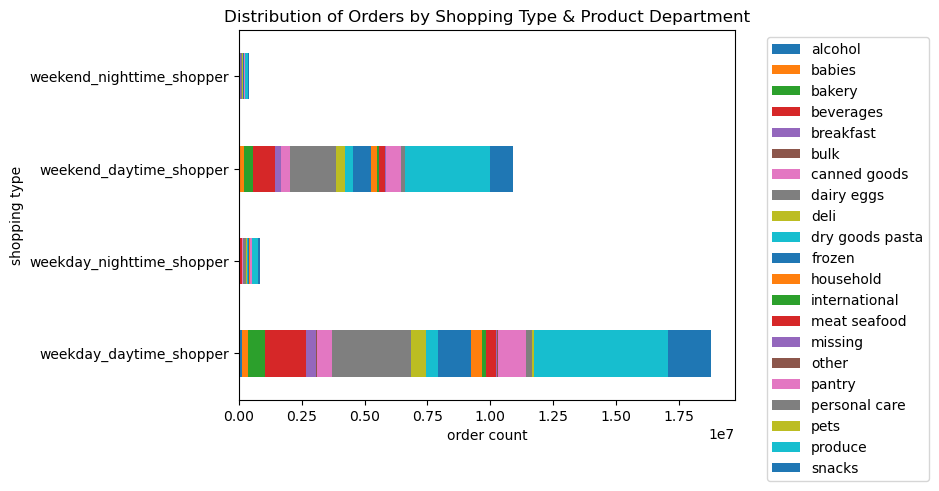

In [187]:
# Plot the bar chart
bar_2_deparmtent_plot = bar_2_department.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopping type')
plt.title('Distribution of Orders by Shopping Type & Product Department')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

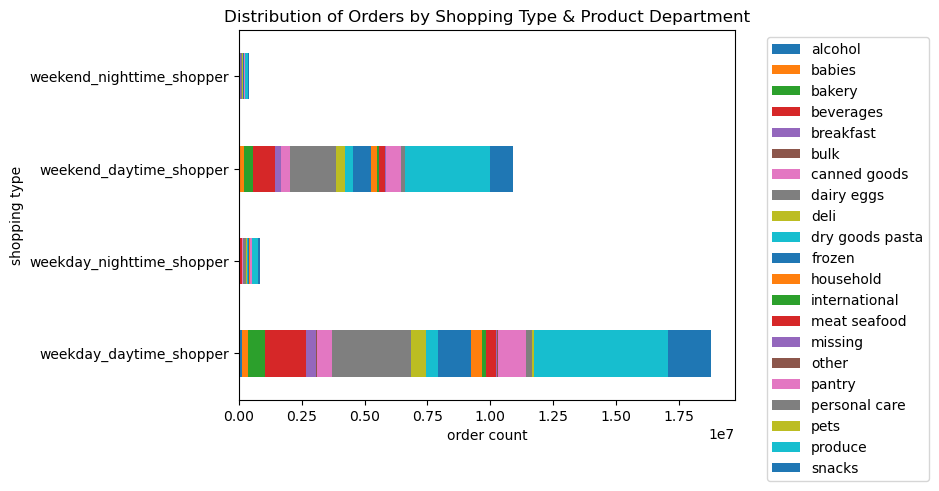

In [188]:
# Create image for export
bar_2_deparmtent_plot.figure

In [189]:
# Export the plot as image file
bar_2_deparmtent_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_21.png'), bbox_inches='tight')

In [190]:
# Group by 'customer_profile_2' and 'order frequency', and count occurrences
bar_2_order_frequency = ords_prods_all.groupby(['customer_profile_2', 'order_frequency_flag']).size().unstack()

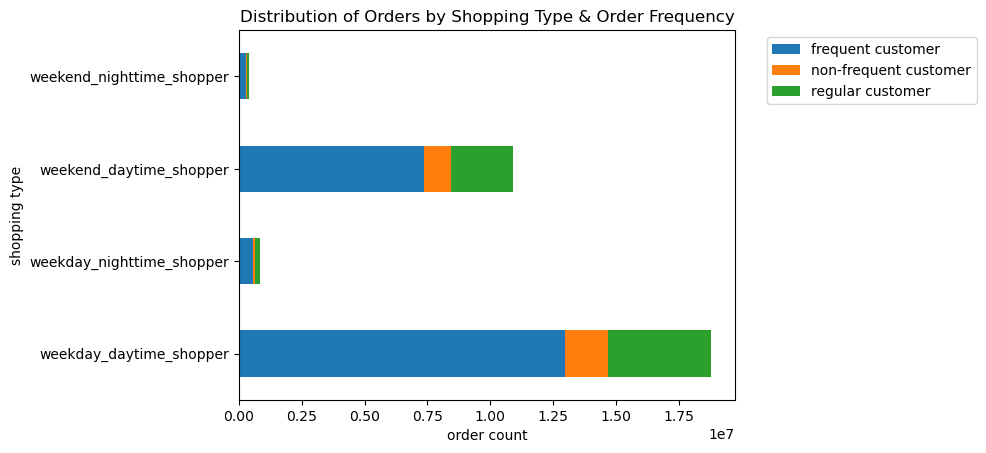

In [191]:
# Plot the bar chart
bar_2_order_frequency_plot = bar_2_order_frequency.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopping type')
plt.title('Distribution of Orders by Shopping Type & Order Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

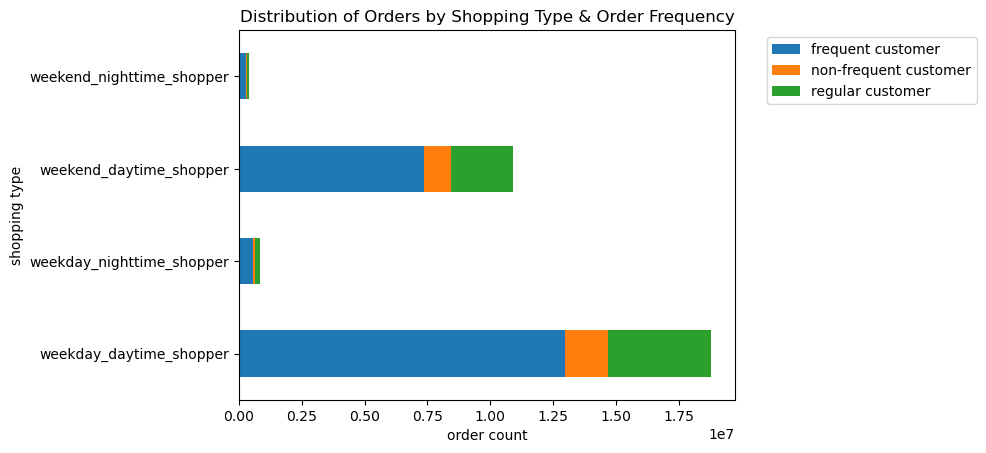

In [192]:
# Create image for export
bar_2_order_frequency_plot.figure

In [193]:
# Export the plot as image file
bar_2_order_frequency_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_22.png'), bbox_inches='tight')

In [223]:
# Group by 'customer_profile_2' and 'product price level', and count occurrences
bar_2_price = ords_prods_all.groupby(['customer_profile_2', 'product_price_level']).size().unstack()

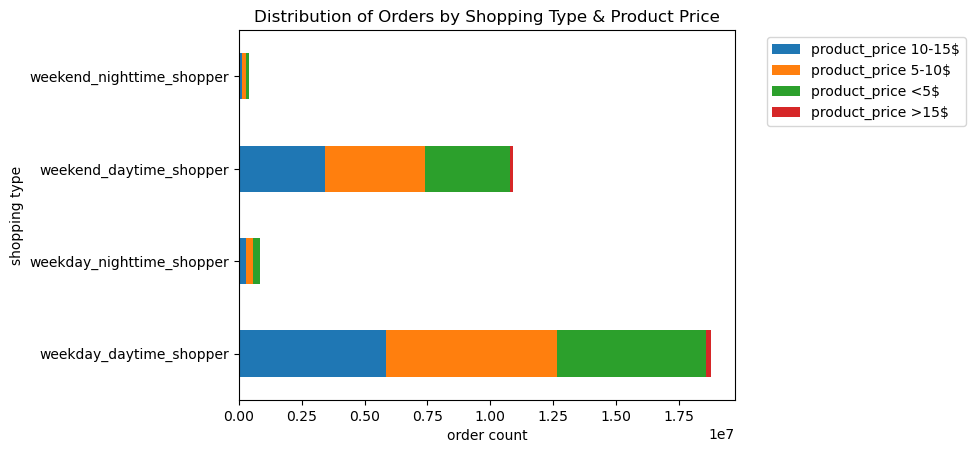

In [224]:
# Plot the bar chart
bar_2_price_plot = bar_2_price.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopping type')
plt.title('Distribution of Orders by Shopping Type & Product Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

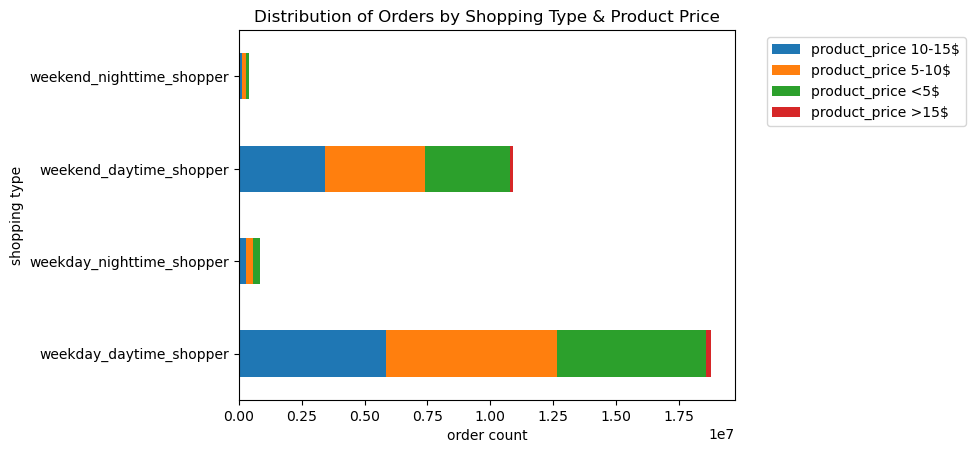

In [225]:
# Create image for export
bar_2_price_plot.figure

In [226]:
# Export the plot as image file
bar_2_price_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_23.png'), bbox_inches='tight')

In [198]:
# Group by 'customer_profile_2' and 'region', and count occurrences
bar_2_region = ords_prods_all.groupby(['customer_profile_2', 'region']).size().unstack()

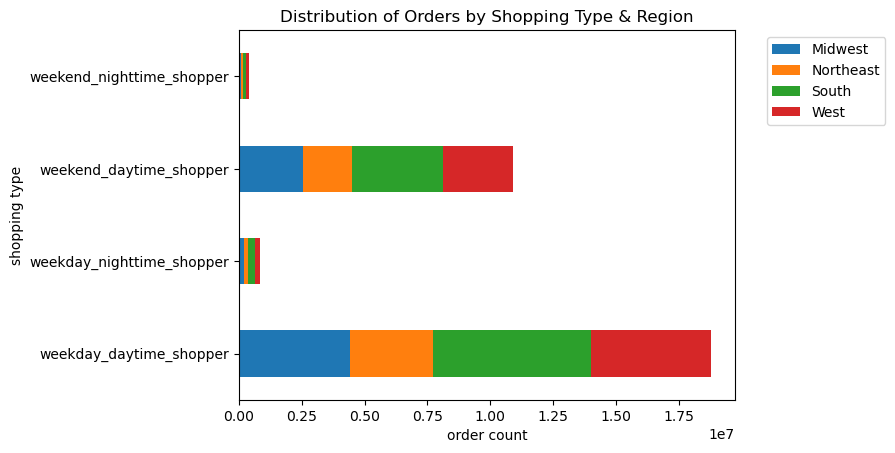

In [199]:
# Plot the bar chart
bar_2_region_plot = bar_2_region.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopping type')
plt.title('Distribution of Orders by Shopping Type & Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

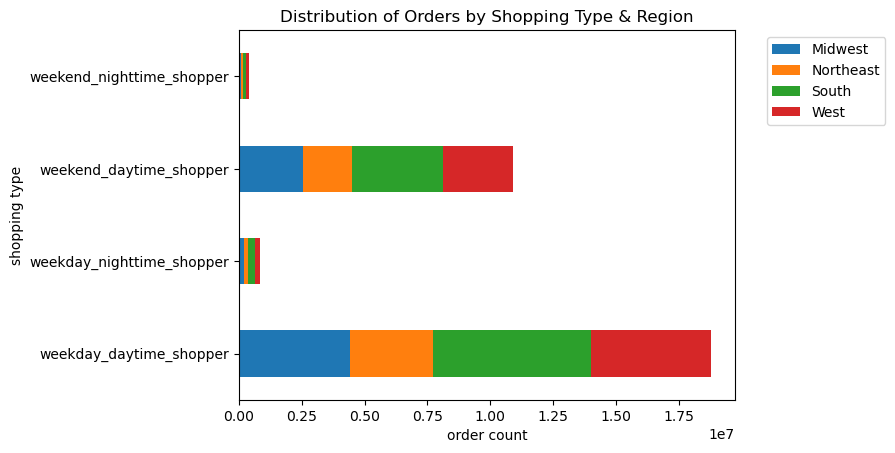

In [200]:
# Create image for export
bar_2_region_plot.figure

In [201]:
# Export the plot as image file
bar_2_region_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_24.png'), bbox_inches='tight')

In [259]:
# Group by 'customer_profile_2' and 'family status', and count occurrences
bar_2_family = ords_prods_all.groupby(['customer_profile_2', 'fam_status']).size().unstack()

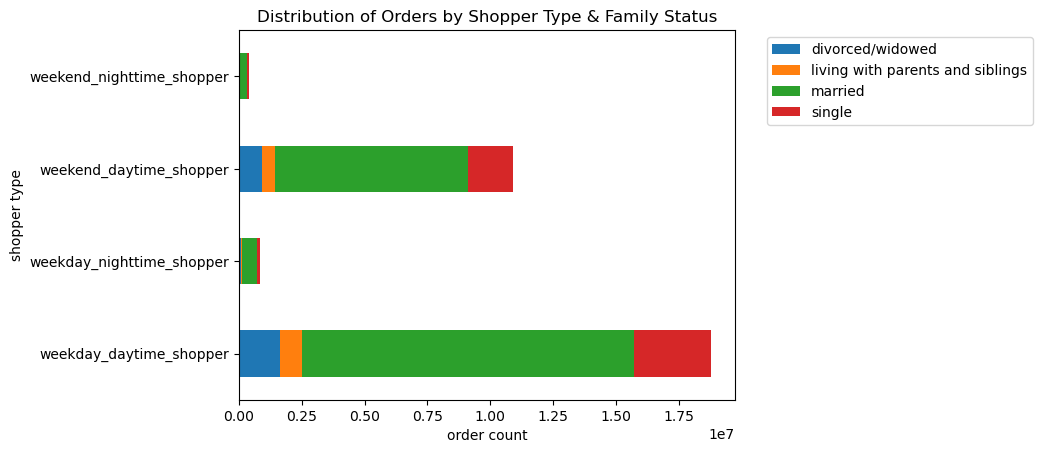

In [264]:
# Plot the bar chart
bar_2_family_plot = bar_2_family.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopper type')
plt.title('Distribution of Orders by Shopper Type & Family Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

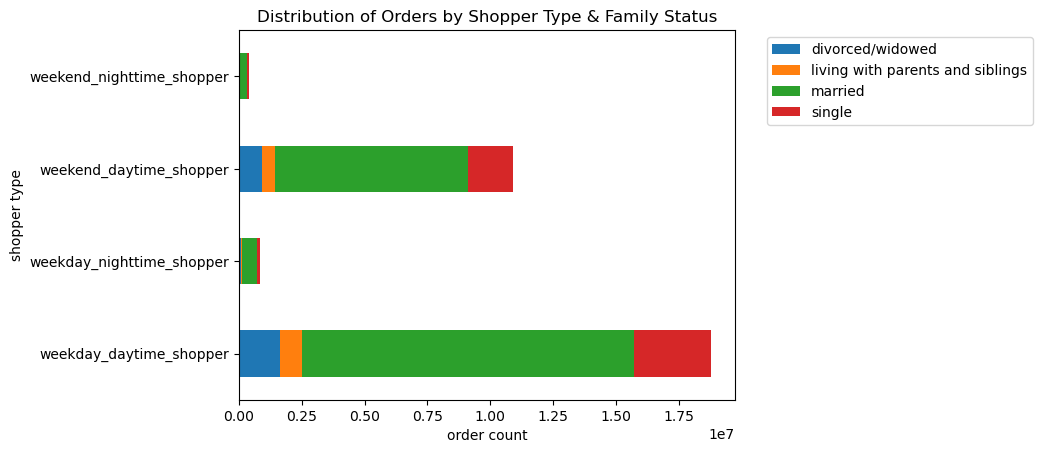

In [265]:
# Create image for export
bar_2_family_plot.figure

In [266]:
# Export the plot as image file
bar_2_family_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_27.png'), bbox_inches='tight')

In [277]:
# Filter for nighttime shopper only
df_nighttime = ords_prods_all.loc[ords_prods_all['customer_profile_2'].isin(['weekend_nighttime_shopper','weekday_nighttime_shopper'])]

SyntaxError: unterminated string literal (detected at line 2) (1059610754.py, line 2)

In [279]:
# Group by 'customer_profile_2' and 'family status', and count occurrences
bar_2_family_night = df_nighttime.groupby(['customer_profile_2', 'fam_status']).size().unstack()

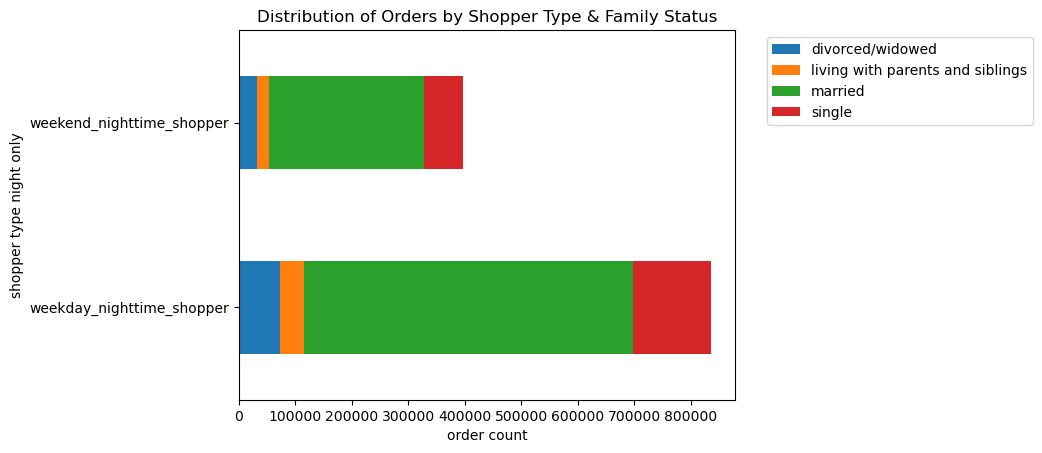

In [280]:
# Plot the bar chart
bar_2_family_night_plot = bar_2_family_night.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopper type night only')
plt.title('Distribution of Orders by Shopper Type & Family Status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

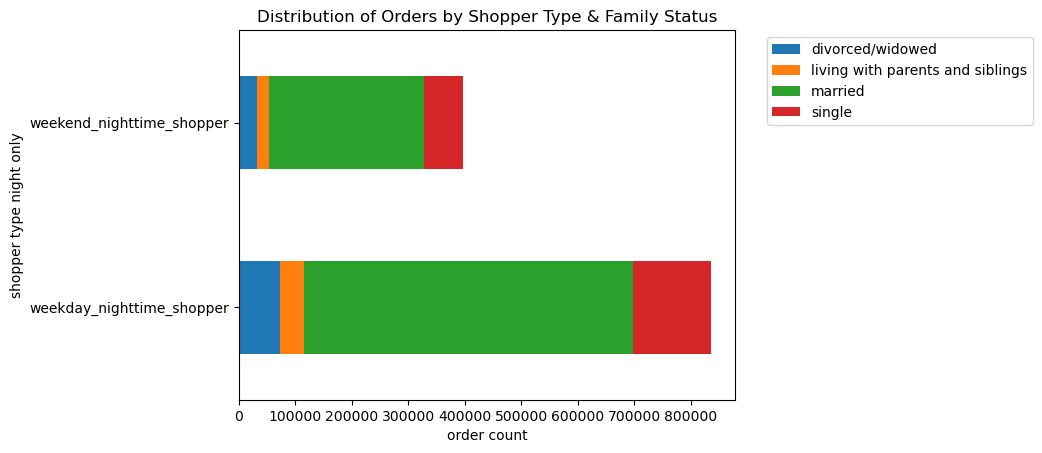

In [282]:
# Create image for export
bar_2_family_night_plot.figure

In [283]:
# Export the plot as image file
bar_2_family_night_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_27a.png'), bbox_inches='tight')

In [267]:
# Group by 'customer_profile_2' and 'product_baby', and count occurrences
bar_2_baby = df_baby.groupby(['customer_profile_2', 'product_baby']).size().unstack()

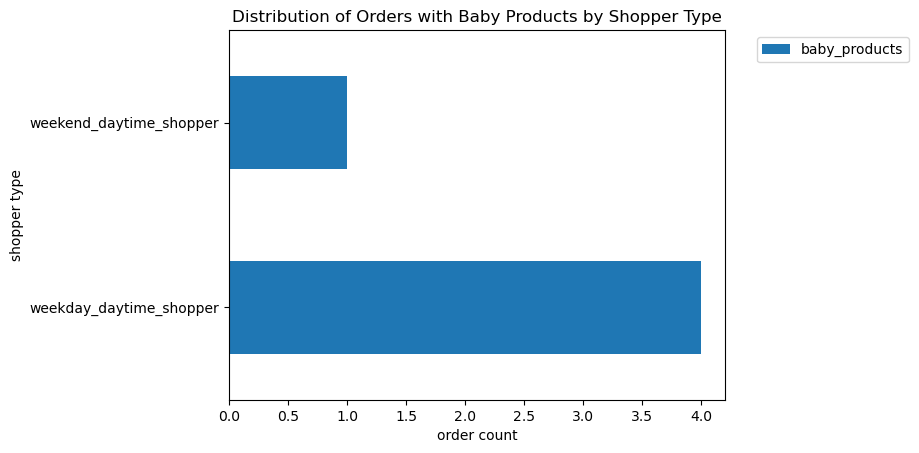

In [269]:
# Plot the bar chart
bar_2_baby_plot = bar_2_baby.plot(kind='barh', stacked=True)
plt.xlabel('order count')
plt.ylabel('shopper type')
plt.title('Distribution of Orders with Baby Products by Shopper Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

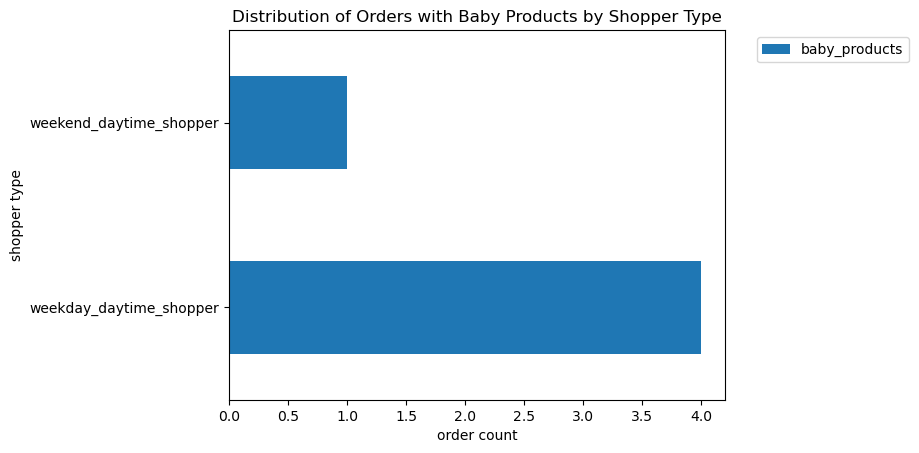

In [270]:
# Create image for export
bar_2_baby_plot.figure

In [271]:
# Export the plot as image file
bar_2_baby_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations','fig_28.png'), bbox_inches='tight')

### Check on Customer distribution

In [210]:
# Group by customer_type_1 and count unique user_id
bar_1_customer = ords_prods_all.groupby('customer_profile_1')['user_id'].nunique().sort_values(ascending=True)

Text(0.5, 1.0, 'Demographic Distribution of Customer')

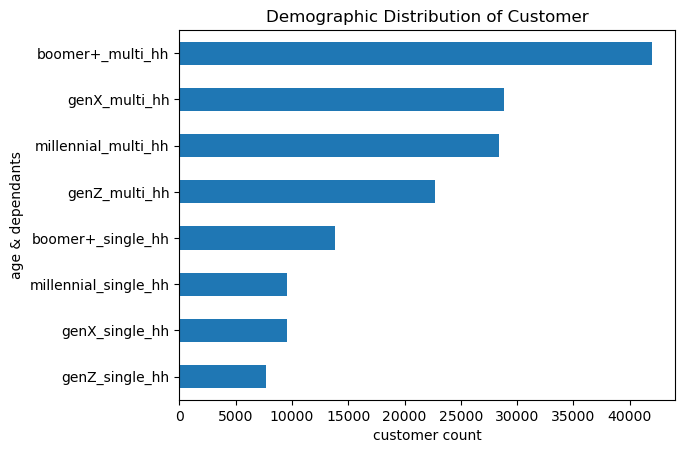

In [212]:
# Plot the bar chart
bar_1_customer_plot = bar_1_customer.plot(kind='barh', stacked=True)
plt.xlabel('customer count')
plt.ylabel('age & dependants')
plt.title('Demographic Distribution of Customer')

In [214]:
# Group by customer_type_1 and count unique user_id
bar_3_customer = ords_prods_all.groupby('region')['user_id'].nunique().sort_values(ascending=True)

Text(0.5, 1.0, 'Regional Distribution of Customer')

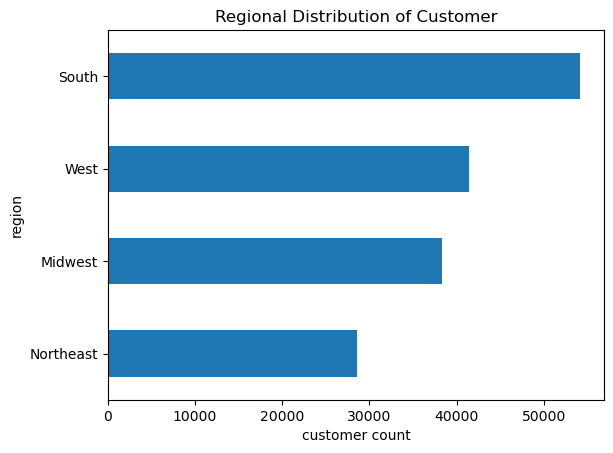

In [215]:
# Plot the bar chart
bar_3_customer_plot = bar_3_customer.plot(kind='barh', stacked=True)
plt.xlabel('customer count')
plt.ylabel('region')
plt.title('Regional Distribution of Customer')

Comment: Customer distribution doesn't reveal additional important insights